In [138]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.feature_extraction.text import CountVectorizer


In [27]:
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate


# Data Cleaning and EDA

In [132]:
movies_df = pd.read_csv('/Users/jackvessa/Galvanize_Notes/Week10/recommender-case-study/data/movies.dat', header=None, sep='::', engine='python')

In [133]:
movies_df.columns = ["MovieID","Title","Genres"]

In [134]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [35]:
movies_df.shape

(3883, 3)

In [375]:
users_df = pd.read_csv('/Users/jackvessa/Galvanize_Notes/Week10/recommender-case-study/data/users.dat', 
                       header=None, sep='::', engine='python')

In [376]:
users_df.columns = ["UserID","Gender","Age","Occupation","Zip-code"]

In [55]:
users_df.tail(5)

,UserID,Gender,Age,Occupation,Zip-code
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


In [33]:
users_df.shape

(6040, 5)

In [377]:
ratings_df = pd.read_csv('/Users/jackvessa/Galvanize_Notes/Week10/recommender-case-study/data/training.csv', 
                        sep=',', engine='python')

In [378]:
ratings_df.head()

,user,movie,rating,timestamp
0,6040,858,4,956703932
1,6040,593,5,956703954
2,6040,2384,4,956703954
3,6040,1961,4,956703977
4,6040,2019,5,956703977


In [83]:
ratings_df.columns = ['u_id','i_id','rating','timestamp']

In [34]:
ratings_df.shape

(800000, 4)

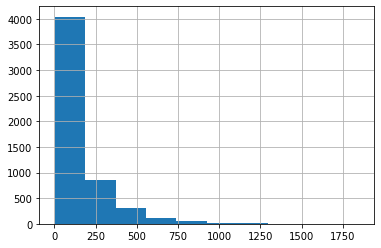

In [36]:
ratings_df.groupby('user')['rating'].count().hist();

In [38]:
print("Max - User Ratings: ", ratings_df.groupby('user')['rating'].count().max())
print("Min - User Ratings: ", ratings_df.groupby('user')['rating'].count().min())

Max - User Ratings:  1849
Min - User Ratings:  2


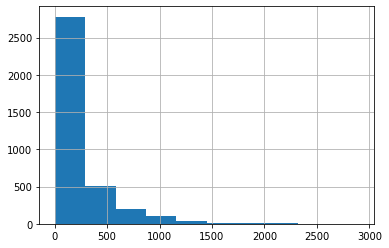

In [39]:
ratings_df.groupby('movie')['rating'].count().hist();

In [37]:
print("Max - Movie Ratings: ", ratings_df.groupby('movie')['rating'].count().max())
print("Min - Movie Ratings: ", ratings_df.groupby('movie')['rating'].count().min())

Max - Movie Ratings:  2901
Min - Movie Ratings:  1


# Utility Matrix (User Ratings of Movies)

In [43]:
num_ratings = len(ratings_df)
num_users = len(ratings_df.groupby('user')['rating'].count())
num_movies = len(ratings_df.groupby('movie')['rating'].count())

In [53]:
print('number of ratings:',num_ratings)
print('number of users  :',num_users)
print('number of movies :',num_movies)

number of ratings: 800000
number of users  : 5399
number of movies : 3662


In [45]:
density_ = num_ratings / (num_users * num_movies)
print("Density: ", density_)

Density:  0.04046302241176001


In [58]:
utility_matrix = ratings_df.pivot(index='user',columns='movie',values='rating')

In [60]:
utility_matrix.head()

movie,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user,,,,,,,,,,,,,,,,,,,,,
636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
637,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Surprise!

In [61]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')

# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9279  0.9445  0.9369  0.9335  0.9379  0.9362  0.0054  
MAE (testset)     0.7329  0.7422  0.7386  0.7379  0.7394  0.7382  0.0030  
Fit time          5.81    8.07    6.88    6.81    5.72    6.66    0.85    
Test time         0.47    0.18    0.29    0.16    0.25    0.27    0.11    


{'test_rmse': array([0.92793788, 0.94452435, 0.93686939, 0.93350652, 0.93791361]),
 'test_mae': array([0.73290577, 0.74224165, 0.7386088 , 0.7378854 , 0.73936588]),
 'fit_time': (5.810806035995483,
  8.066439867019653,
  6.875046730041504,
  6.810067892074585,
  5.723956823348999),
 'test_time': (0.4668550491333008,
  0.1805119514465332,
  0.2934226989746094,
  0.15915417671203613,
  0.2522768974304199)}

In [62]:
from surprise import BaselineOnly
from surprise import SVD
from surprise import Dataset
from surprise import dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import accuracy
from surprise.model_selection import KFold


In [63]:
kf = KFold(n_splits=4)

for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.mae(predictions, verbose=True)

MAE:  0.7373
MAE:  0.7478
MAE:  0.7402
MAE:  0.7433


In [66]:
reader = Reader(line_format='user item rating', rating_scale=(1, 5))

# Also, a dummy Dataset class
class MyDataset(dataset.DatasetAutoFolds):
    def __init__(self, ratings_df, reader):
        self.raw_ratings = [(uid, iid, r, None) for (uid, iid, r) in
                            zip(ratings_df['user'], ratings_df['movie'], ratings_df['rating'])]
        self.reader=reader
# You should now be able to use the data object normally.
#data.split(n_folds=3)
# algo = SVD()
# perf = evaluate(algo, data, measures=['RMSE', 'MAE'])
# print_perf(perf)

In [67]:
# Create MyDataset Object
data = MyDataset(ratings_df, reader)

# Define Algorithm
algo = SVD()

# Cross Validate
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8818  0.8832  0.8824  0.8816  0.8854  0.8829  0.0014  
MAE (testset)     0.6935  0.6933  0.6937  0.6913  0.6953  0.6934  0.0013  
Fit time          42.28   41.22   41.39   41.08   41.28   41.45   0.42    
Test time         2.31    1.98    1.64    1.63    1.63    1.84    0.27    


{'test_rmse': array([0.8818224 , 0.88322844, 0.88244236, 0.88155987, 0.8854347 ]),
 'test_mae': array([0.69350132, 0.69326914, 0.69371785, 0.69132747, 0.69533006]),
 'fit_time': (42.27565908432007,
  41.21634888648987,
  41.38626503944397,
  41.084054946899414,
  41.28266000747681),
 'test_time': (2.311436176300049,
  1.9818761348724365,
  1.6423988342285156,
  1.6304008960723877,
  1.6317458152770996)}

## SVD - 4 Folds

In [68]:
# Create MyDataset Object
data = MyDataset(ratings_df, reader)

# Define Algorithm
algo = SVD()

# Create KFold object and define number of folds
kf = KFold(n_splits=4)

# Perform Model Testing
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.mae(predictions, verbose=True)

MAE:  0.6998
MAE:  0.6970
MAE:  0.6958
MAE:  0.6958


## SVD - 5 Folds

In [69]:
# Create MyDataset Object
data = MyDataset(ratings_df, reader)

# Define Algorithm
algo = SVD()

# Create KFold object and define number of folds
kf = KFold(n_splits=5)

# Perform Model Testing
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.mae(predictions, verbose=True)

MAE:  0.6931
MAE:  0.6929
MAE:  0.6930
MAE:  0.6952
MAE:  0.6935


## KNNBasic - 5 Folds

In [77]:
from surprise import KNNBasic

# Create MyDataset Object
data = MyDataset(ratings_df, reader)

# Define Algorithm
algo = KNNBasic()

# Create KFold object and define number of folds
kf = KFold(n_splits=5)

# Perform Model Testing
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.mae(predictions, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7295
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7363
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7341
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7313
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7324


## Gridsearching

In [79]:
# from surprise.model_selection import GridSearchCV

# %%time

# # Create MyDataset Object
# data = MyDataset(ratings_df, reader)

# ### Can Create Function to do this more efficiently

# # Specify Parameters for Gridsearch
# param_grid = {'n_epochs': [5, 10, 15, 20], 'lr_all': [0.001, 0.002, 0.005],
#               'reg_all': [0.4, 0.6]}

# # Gridsearch using SVD Algorithm, specified parameters, measures, and Cross Folds (5)
# gs = GridSearchCV(SVD, param_grid, measures=['mae'], cv=5)

# # Fit the Data
# gs.fit(data)

# # best RMSE score
# print(gs.best_score['mae'])

# # combination of parameters that gave the best RMSE score
# print(gs.best_params['mae'])

In [115]:
from funk_svd.dataset import fetch_ml20m_ratings
from funk_svd import SVD

from sklearn.metrics import mean_absolute_error


df = ratings_df

def funk_svd_mae(df, frac=0.8,random_state=7,learning_rate=0.003,regularization=0.00792, n_epochs=370,
           n_factors=6, min_rating=1, max_rating=5, early_stopping=False, shuffle=False):

    train = df.sample(frac=frac, random_state=random_state)
    val = df.drop(train.index.tolist()).sample(frac=frac, random_state=random_state)
    test = df.drop(train.index.tolist()).drop(val.index.tolist())

    svd = SVD(learning_rate=learning_rate, regularization=regularization, n_epochs=n_epochs,
               n_factors=n_factors, min_rating=min_rating, max_rating=max_rating)

    svd.fit(X=train, X_val=val, early_stopping=early_stopping, shuffle=shuffle);


    pred = svd.predict(test)
    mae = mean_absolute_error(test['rating'], pred)

    print('Test MAE: {:.2f}'.format(mae))
    
    return mae

In [116]:
## best_mae = 1.0
#learning_rates = [0.0026,0.0028,0.003,0.0032,0.0034]
#num_factors = [5,6,7,8,9]
#regularizations=[0.00788,0.00789,0.00787,0.0079,0.00791,0.00792,0.00793]
# epochs = [330,340,350,360,370]

# for i in epochs:
#     temp_mae = funk_svd_mae(df, n_epochs=i);
#     if temp_mae < best_mae:
#         best_mae = temp_mae
#         best_ep = i
        
# print("Best Epochs:",best_ep)
# print("Best MAE:",best_mae)

In [203]:
# users_df.groupby('Zip-code').size().sort_values().tail(50)

In [175]:
movies_df.tail(20)

,MovieID,Title,Genres,title,year,genres,genres2
3863,3933,"Killer Shrews, The (1959)",Horror|Sci-Fi,"Killer Shrews, The",1959,Horror Sci-Fi,Horror Sci-Fi
3864,3934,Kronos (1957),Sci-Fi,Kronos,1957,Sci-Fi,Sci-Fi
3865,3935,Kronos (1973),Horror,Kronos,1973,Horror,Horror
3866,3936,"Phantom of the Opera, The (1943)",Drama|Thriller,"Phantom of the Opera, The",1943,Drama Thriller,Drama Thriller
3867,3937,Runaway (1984),Sci-Fi|Thriller,Runaway,1984,Sci-Fi Thriller,Sci-Fi Thriller
3868,3938,"Slumber Party Massacre, The (1982)",Horror,"Slumber Party Massacre, The",1982,Horror,Horror
3869,3939,"Slumber Party Massacre II, The (1987)",Horror,"Slumber Party Massacre II, The",1987,Horror,Horror
3870,3940,"Slumber Party Massacre III, The (1990)",Horror,"Slumber Party Massacre III, The",1990,Horror,Horror
3871,3941,Sorority House Massacre (1986),Horror,Sorority House Massacre,1986,Horror,Horror
3872,3942,Sorority House Massacre II (1990),Horror,Sorority House Massacre II,1990,Horror,Horror


In [183]:
from sklearn.metrics.pairwise import cosine_similarity

#movies_df['title'] = movies_df['Title'].apply(lambda x: x.split(' (')[0])


movies_df['year'] = movies_df['Title'].apply(lambda x: x[-5:-1])


movies_df['genres'] = movies_df['Genres'].apply(lambda x: x.replace("'", "").split("|"))
movies_df['genres'] = movies_df['genres'].apply(lambda x: " ".join(x))

# vectorizer = CountVectorizer()
# title_vec = vectorizer.fit_transform(movies_df['title'])
# title_vec = title_vec.toarray()
# titles = vectorizer.get_feature_names()

vectorizer = CountVectorizer()
genre_vec = vectorizer.fit_transform(movies_df['genres'])
genre_vec = genre_vec.toarray()
genres = vectorizer.get_feature_names()

vectorizer = CountVectorizer()
year_vec = vectorizer.fit_transform(movies_df['year'])
year_vec = year_vec.toarray()
years = vectorizer.get_feature_names()

# features = np.concatenate((genre_vec, year_vec),axis=1)
# feat_cos_sim = cosine_similarity(features)

movies_df.head()

,MovieID,Title,Genres,title,year,genres,genres2
0,1,Toy Story (1995),Animation|Children's|Comedy,Toy Story,1995,Animation Childrens Comedy,Animation Childrens Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji,1995,Adventure Childrens Fantasy,Adventure Childrens Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995,Comedy Romance,Comedy Romance
3,4,Waiting to Exhale (1995),Comedy|Drama,Waiting to Exhale,1995,Comedy Drama,Comedy Drama
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995,Comedy,Comedy


In [189]:
genre_df = pd.DataFrame(genre_vec)
genre_df.columns = genres
genre_df.drop(columns=['fi'],inplace=True)
genre_df.index = movies_df['MovieID']

In [190]:
genre_df.tail(2)

,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film,horror,musical,mystery,noir,romance,sci,thriller,war,western
MovieID,,,,,,,,,,,,,,,,,,,
3951,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3952,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [191]:
year_df = pd.DataFrame(year_vec)
year_df.columns = years
year_df.index = movies_df['MovieID']

In [192]:
year_df

,1919,1920,1921,1922,1923,1925,1926,1927,1928,1929,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
MovieID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3949,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [193]:
genre_year_df = pd.concat((genre_df,year_df),axis=1)

In [194]:
genre_year_df

,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
MovieID,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3949,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3950,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [207]:
from sklearn.metrics.pairwise import cosine_similarity

movies_df['year'] = movies_df['Title'].apply(lambda x: x[-5:-1])
movies_df['genres'] = movies_df['Genres'].apply(lambda x: x.replace("'", "").split("|"))
movies_df['genres'] = movies_df['genres'].apply(lambda x: " ".join(x))

vectorizer = CountVectorizer()
genre_vec = vectorizer.fit_transform(movies_df['genres'])
genre_vec = genre_vec.toarray()
genres = vectorizer.get_feature_names()

vectorizer = CountVectorizer()
year_vec = vectorizer.fit_transform(movies_df['year'])
year_vec = year_vec.toarray()
years = vectorizer.get_feature_names()

genre_df = pd.DataFrame(genre_vec)
genre_df.columns = genres
genre_df.drop(columns=['fi'],inplace=True)
genre_df.index = movies_df['MovieID']

year_df = pd.DataFrame(year_vec)
year_df.columns = years
year_df.index = movies_df['MovieID']

genre_year_df = pd.concat((genre_df,year_df),axis=1)

movie_sim = pd.DataFrame(cosine_similarity(genre_year_df))

In [217]:
vectorizer = CountVectorizer()
gender_vec = vectorizer.fit_transform(users_df['Gender'])
gender_vec = gender_vec.toarray()
genders = vectorizer.get_feature_names()

gender_df = pd.DataFrame(gender_vec)
gender_df.columns = genders
gender_df.index = users_df['UserID']

In [234]:
def col_to_vector_df(df,col_title,index):
    df[col_title] = df[col_title].apply(lambda x: str(x))
    vectorizer = CountVectorizer(token_pattern = r"(?u)\b\w+\b")
    X = vectorizer.fit_transform(df[col_title])
    
    temp_df = pd.DataFrame(X.toarray())
    temp_df.columns = vectorizer.get_feature_names()
    temp_df.index = df[index]
    
    return temp_df

In [238]:
gender_df = col_to_vector_df(users_df,'Gender','UserID')
age_df = col_to_vector_df(users_df,'Age','UserID')
occupation_df = col_to_vector_df(users_df,'Occupation','UserID')
zip_df = col_to_vector_df(users_df,'Zip-code','UserID')

user_feature_df = pd.concat((gender_df,age_df,occupation_df,zip_df),axis=1)


In [239]:
user_sim = pd.DataFrame(cosine_similarity(user_feature_df))

In [244]:
user_sim[0].describe()

count    6040.000000
mean        0.088175
std         0.144037
min         0.000000
25%         0.000000
50%         0.000000
75%         0.250000
max         1.000000
Name: 0, dtype: float64

In [246]:
user_feature_df_nozip = pd.concat((gender_df,age_df,occupation_df),axis=1)
user_sim_nozip = pd.DataFrame(cosine_similarity(user_feature_df_nozip))

In [247]:
user_sim_nozip[0].describe()

count    6040.000000
mean        0.117329
std         0.191428
min         0.000000
25%         0.000000
50%         0.000000
75%         0.333333
max         1.000000
Name: 0, dtype: float64

In [266]:
get_sim_users(50,user_sim_nozip,10)

[0, 74, 85, 98, 118, 193, 209, 467, 469, 483]

In [294]:
users_df.head(1)

,UserID,Gender,Age,Occupation,Zip-code
0,1,Female,1,10,48067


In [297]:
ratings_df.head(1)

,u_id,i_id,rating,timestamp
0,6040,858,4,956703932


In [298]:
unrated_users = set(np.array(users_df['UserID'])) - set(np.array(ratings_df['u_id']))

In [328]:
user_list = get_sim_users(50,user_sim_nozip,500)

In [329]:
unrated_user_list = list(unrated_users)

In [330]:
rated_user_list = []

for i in user_list:
    if i not in unrated_user_list:
        rated_user_list.append(i)

In [331]:
len(rated_user_list)

307

In [ ]:
unrated_users = set(np.array(users_df['UserID'])) - set(np.array(ratings_df['u_id']))
unrated_user_list = list(unrated_users)

rated_user_list = []
for i in user_list:
    if i not in unrated_user_list:
        rated_user_list.append(i)
        


In [340]:
def get_sim_users(user, sim_matrix, n=5):
    '''
    '''
    user_series = sim_matrix.loc[user]
    
    x = list(user_series.nlargest(n=n+1).index[:])
    
    x.remove(user)
    
    return x

In [335]:
def user_to_rated_user(user_list):
    unrated_users = set(np.array(users_df['UserID'])) - set(np.array(ratings_df['u_id']))
    unrated_user_list = list(unrated_users)

    rated_user_list = []
    for i in user_list:
        if i not in unrated_user_list:
            rated_user_list.append(i)
                                   
    return rated_user_list

In [336]:
def get_avg_movie_rating(user_list,movie,utility_matrix):
    '''
    '''
    
    rated_user_list = user_to_rated_user(user_list)
    
    return utility_matrix[movie].loc[rated_user_list].mean()
    

In [339]:
utility_matrix[500].loc[rated_user_list].mean() 

/Users/jackvessa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


3.3

In [354]:
user_list = get_sim_users(17,user_sim_nozip,10)

In [360]:
avg_similar_rating = get_avg_movie_rating(user_list,100,utility_matrix)
avg_similar_rating

nan

In [363]:
import math

In [366]:
utility_matrix[100].mean()

3.11

In [364]:
if math.isnan(avg_similar_rating):
    print(5)

5


In [367]:
def get_avg_movie_rating(user_list,movie,utility_matrix):
    '''
    '''
    
    rated_user_list = user_to_rated_user(user_list)
    
    avg_rating = utility_matrix[movie].loc[rated_user_list].mean()
    
    if math.isnan(avg_similar_rating):
        return utility_matrix[movie].mean()
    
    return avg_rating

In [368]:
utility_matrix

movie,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user,,,,,,,,,,,,,,,,,,,,,
636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
637,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [383]:
import recommender

In [384]:
mr = recommender.MovieRecommender(users_df,ratings_df)

In [385]:
mr.get_avg_movie_rating(4958,1924)

TypeError: get_avg_movie_rating() takes 2 positional arguments but 3 were given

In [386]:
print(5)

5


In [389]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=False)

Start downloading data for rich info zipcode database, total size 450+MB ...
  10 MB finished ...
  20 MB finished ...
  30 MB finished ...
  40 MB finished ...
  50 MB finished ...
  60 MB finished ...
  70 MB finished ...
  80 MB finished ...
  90 MB finished ...
  100 MB finished ...
  110 MB finished ...
  120 MB finished ...
  130 MB finished ...
  140 MB finished ...
  150 MB finished ...
  160 MB finished ...
  170 MB finished ...
  180 MB finished ...
  190 MB finished ...
  200 MB finished ...
  210 MB finished ...
  220 MB finished ...
  230 MB finished ...
  240 MB finished ...
  250 MB finished ...
  260 MB finished ...
  270 MB finished ...
  280 MB finished ...
  290 MB finished ...
  300 MB finished ...
  310 MB finished ...
  320 MB finished ...
  330 MB finished ...
  340 MB finished ...
  350 MB finished ...
  360 MB finished ...
  370 MB finished ...
  380 MB finished ...
  390 MB finished ...
  400 MB finished ...
  410 MB finished ...
  420 MB finished ...
  430 MB

In [391]:
zipper = search.by_zipcode(11030)

In [393]:
zipper.state

'NY'

In [394]:
users_df = pd.read_csv('/Users/jackvessa/Galvanize_Notes/Week10/recommender-case-study/data/users.dat', 
                       header=None, sep='::', engine='python')

In [395]:
users_df.columns = ["UserID","Gender","Age","Occupation","Zip-code"]

In [403]:
users_df_2 = users_df[:]

In [404]:
%%time

users_df_2['state'] = users_df_2['Zip-code'].apply(lambda x: search.by_zipcode(x).state)

/Users/jackvessa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [405]:
users_df_2

,UserID,Gender,Age,Occupation,Zip-code,state
0,1,F,1,10,48067,MI
1,2,M,56,16,70072,LA
2,3,M,25,15,55117,MN
3,4,M,45,7,02460,MA
4,5,M,25,20,55455,MN
...,...,...,...,...,...,...
6035,6036,F,25,15,32603,FL
6036,6037,F,45,1,76006,TX
6037,6038,F,56,1,14706,NY
6038,6039,F,45,0,01060,MA


In [406]:
mr = recommender.MovieRecommender(users_df,ratings_df)

In [407]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  4


In [408]:
pool = mp.Pool(mp.cpu_count())